# "Caso de Estudio 2 - Parkinsons Disease"
> "Construcción de un modelo que pueda discriminar entre personas con la enfermedad o no utilizando muestras de voz"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [jupyter, GeneticFeatureSelection, PCA, Ensembles, FeatureEngineering, NaiveBayes, HyperparameterOptimization, KNN]
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:

import os, types
import pandas as pd

df_data_1 = pd.read_csv("./data/parkinsons.csv")
df_data_1.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
df = df_data_1.copy()

In [3]:
df.shape

(195, 24)

In [4]:
print(df.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
#collapse_show
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Data Visualization

In [9]:
print(df.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [10]:
df.drop(columns=["name"], inplace=True)

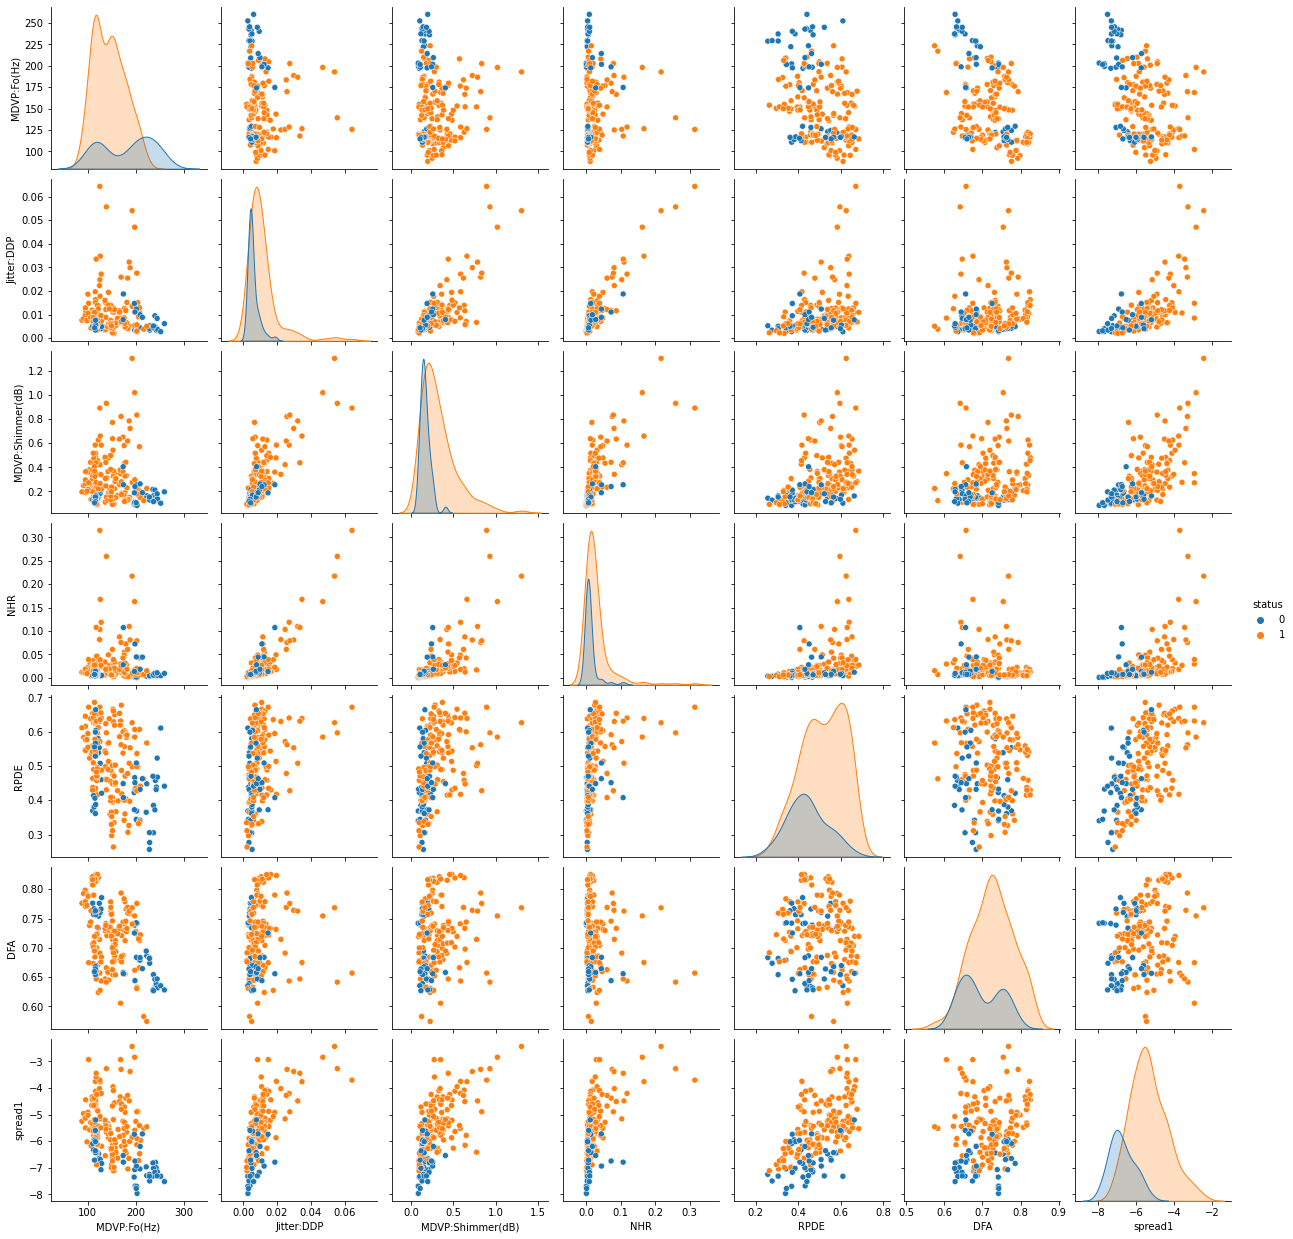

In [11]:
g= sns.pairplot(df, hue ='status', vars=['MDVP:Fo(Hz)', 'Jitter:DDP', 'MDVP:Shimmer(dB)','NHR', 'RPDE', 'DFA', 'spread1'])

In [12]:
#collapse_show
df.corr()["status"]

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

In [13]:
from itertools import combinations

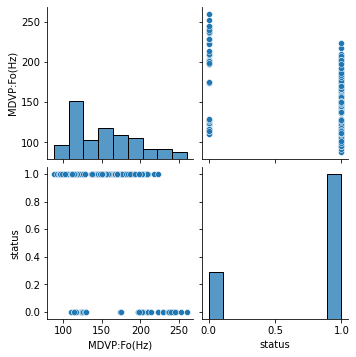

In [14]:
sns.pairplot(df, vars=["MDVP:Fo(Hz)", "status"])
plt.show()

## Transformaciones a predictores con distribución sesgada (skewed)

In [15]:
#collapse_show
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [16]:
status_df = df[["status"]]
predictor_df = df.drop(columns=["status"])

In [17]:
predictor_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [18]:
skew_df =pd.DataFrame(predictor_df.skew().to_list(),index=predictor_df.skew().index.to_list(), columns=["skew"])
#predictor_df.skew().index.to_list()
#skew_df.head()
skewedCols = skew_df[skew_df["skew"]>1]
skewedCols.head(10)
skewedCols = skewedCols.index.to_list()
print(skewedCols)

['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR']


In [19]:
skew_df = df[skewedCols]
skew_df.shape

(195, 14)

In [20]:
skew_df.head()
    

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR
0,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211
1,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929
2,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309
3,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353
4,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767


In [21]:
#collapse_show
skew_df.describe()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847
std,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418
min,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650
25%,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925
50%,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660
75%,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640
max,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820


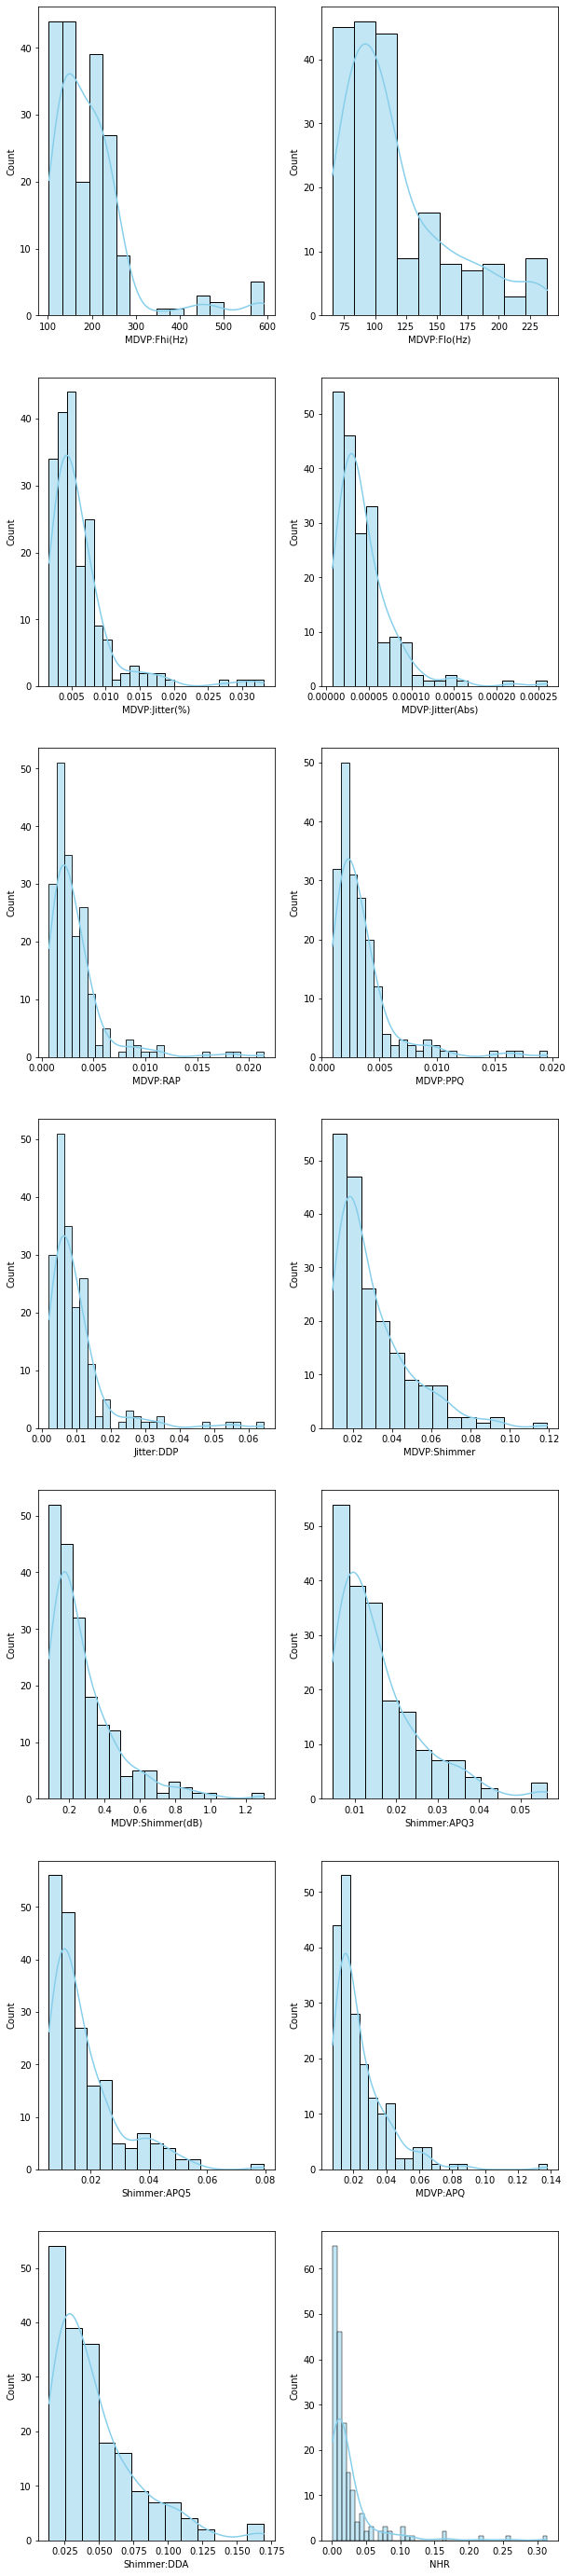

In [22]:
#collapse_show
fig, axs = plt.subplots(7,2 , figsize=(10, 50))
col = [0, 1]
row = [x for x in range(0,7)]
import itertools
cartesian_product = itertools.product(row, col)
axis_coords = list(cartesian_product)

i=0
for column in skew_df.columns.to_list():
    sns.histplot(data=skew_df, x=str(column), kde=True, color="skyblue", ax=axs[axis_coords[i][0], axis_coords[i][1]])
    i+=1

In [23]:
import numpy as np
skew_df = np.log(skew_df)

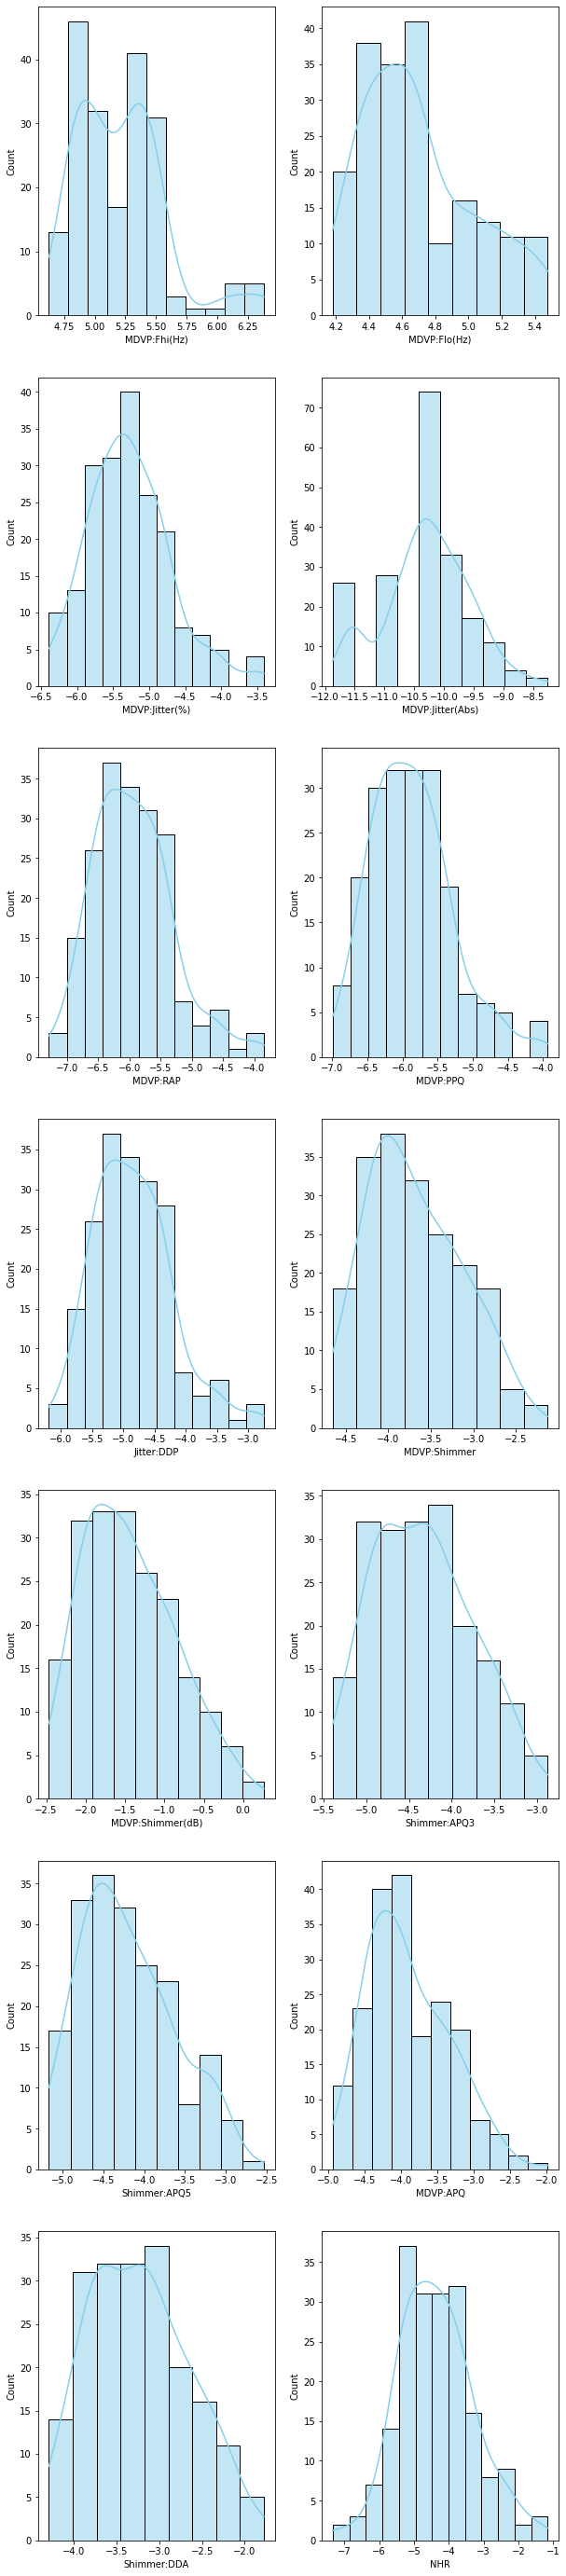

In [24]:
fig, axs = plt.subplots(7,2 , figsize=(10, 50))
col = [0, 1]
row = [x for x in range(0,7)]
import itertools
cartesian_product = itertools.product(row, col)
axis_coords = list(cartesian_product)

i=0
for column in skew_df.columns.to_list():
    sns.histplot(data=skew_df, x=str(column), kde=True, color="skyblue", ax=axs[axis_coords[i][0], axis_coords[i][1]])
    i+=1

In [25]:
predictor_df[skew_df.columns.to_list()] = skew_df[skew_df.columns.to_list()]
predictor_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,5.058168,4.317448,-4.848516,-9.567015,-5.599422,-5.195761,-4.501711,-3.129492,-0.853316,...,-3.516272,-2.726469,-3.811725,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,5.001595,4.734609,-4.637693,-9.433484,-5.370888,-4.967576,-4.272993,-2.791323,-0.468405,...,-3.130865,-2.364141,-3.948168,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,4.876044,4.714518,-4.556380,-9.315701,-5.213976,-4.852350,-4.114751,-2.950185,-0.729811,...,-3.327018,-2.492536,-4.335907,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,4.926318,4.712822,-4.608175,-9.315701,-5.294325,-4.964706,-4.196377,-2.901878,-0.659712,...,-3.277565,-2.433719,-4.302846,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,4.954284,4.706417,-4.355190,-9.115030,-5.028290,-4.701681,-3.929169,-2.744974,-0.537854,...,-3.108901,-2.256656,-4.035887,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Normalización con transformación Z

In [26]:
#normalize
normalized_df=(predictor_df-predictor_df.mean())/predictor_df.std()
normalized_df["status"] = status_df["status"]
normalized_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.827171,-0.415271,-1.127228,0.730419,1.001937,0.545302,1.150192,0.543770,0.988053,1.019244,...,0.869064,0.496891,-0.192729,-0.805764,1.756293,0.799266,0.479243,-0.209990,0.866655,1
1,-0.768992,-0.571305,0.113642,1.097305,1.189745,0.905477,1.541298,0.904351,1.594278,1.679079,...,1.488615,0.372162,-0.632879,-0.386529,1.832844,1.476053,1.307819,0.274371,1.798974,1
2,-0.907141,-0.917587,0.053878,1.238811,1.355404,1.152774,1.738793,1.153822,1.309491,1.230963,...,1.269071,0.017714,-0.279042,-0.660375,1.937062,1.138515,1.015070,-0.103363,1.399060,1
3,-0.907286,-0.778925,0.048834,1.148675,1.355404,1.026142,1.546216,1.025137,1.396090,1.351129,...,1.369642,0.047937,-0.280624,-0.611559,1.827676,1.437245,1.290518,0.061985,1.802314,1
4,-0.923281,-0.701794,0.029783,1.588933,1.637642,1.445419,1.997038,1.446398,1.677367,1.560025,...,1.672406,0.291975,-0.505444,-0.781010,1.904461,1.776368,0.095948,-0.129692,2.261262,1


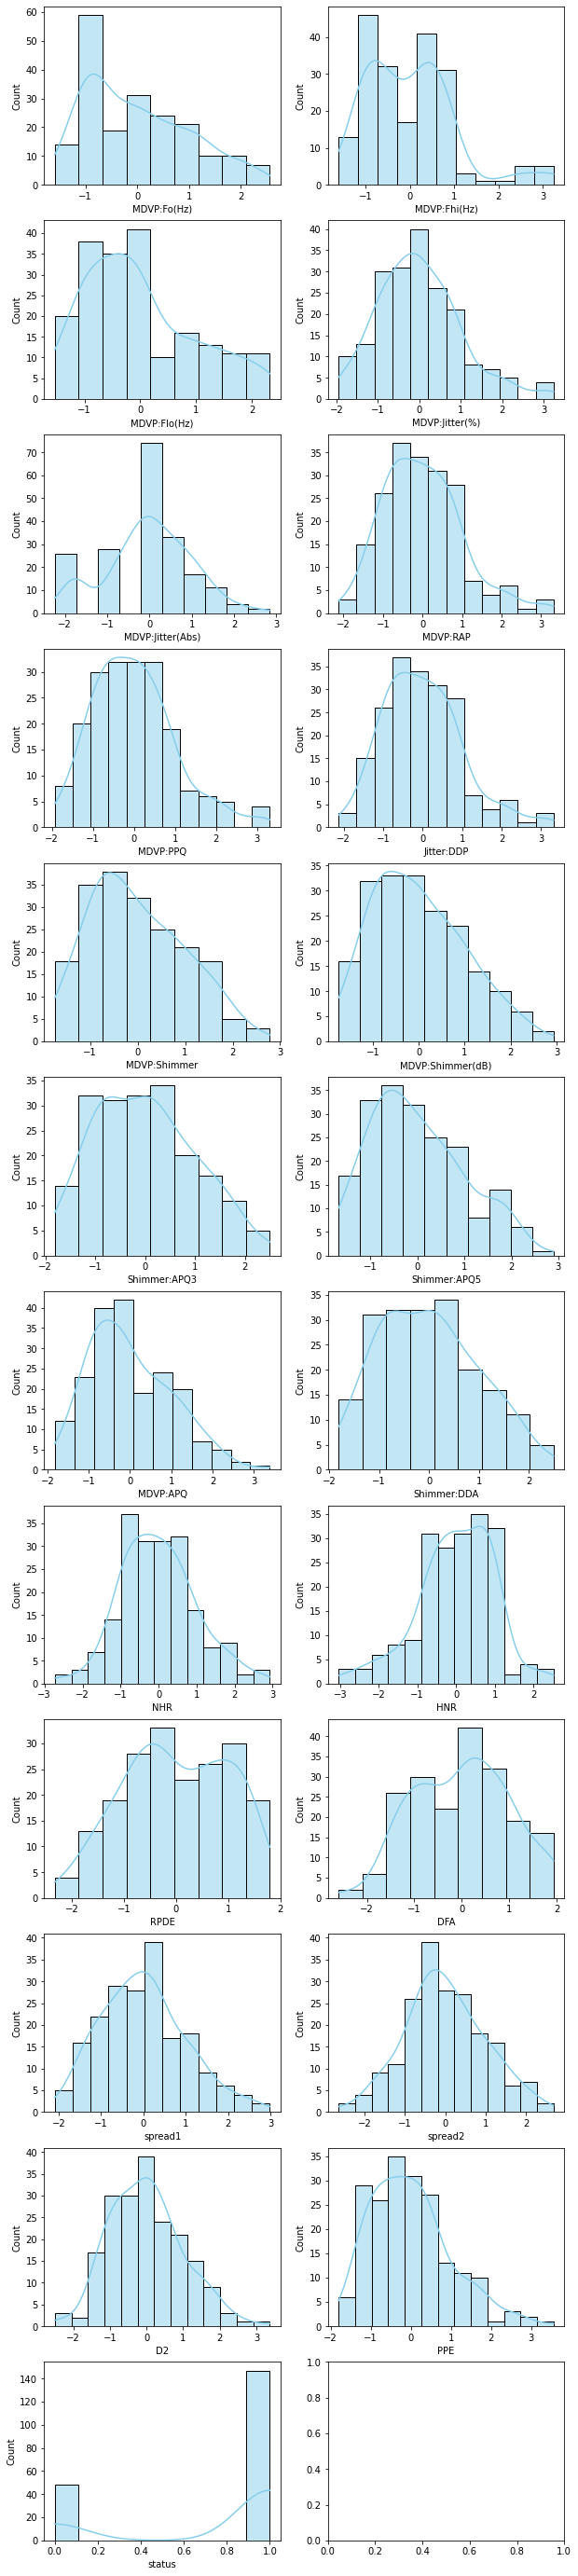

In [27]:
#collapse_show
fig, axs = plt.subplots(12,2 , figsize=(10, 50))
col = [0, 1]
row = [x for x in range(0,12)]
cartesian_product = itertools.product(row, col)
axis_coords = list(cartesian_product)

i=0
for column in normalized_df.columns.to_list():
    sns.histplot(data=normalized_df, x=str(column), kde=True, color="skyblue", ax=axs[axis_coords[i][0], axis_coords[i][1]])
    i+=1

## Modelado y feature engineering

### Benchmarking con Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

benchmark_df = df.copy()
y = benchmark_df["status"]
X = benchmark_df.drop(columns=["status"])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.30, random_state=42)

In [30]:
from  sklearn.metrics import *
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        15
           1       0.91      0.73      0.81        44

    accuracy                           0.75        59
   macro avg       0.71      0.76      0.71        59
weighted avg       0.81      0.75      0.76        59



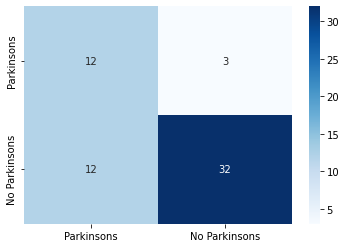

In [31]:
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ["Parkinsons", "No Parkinsons"]
sns.heatmap(cf_matrix, annot=True,cmap='Blues', xticklabels=categories, yticklabels=categories)


In [33]:
from genetic_selection import * 
from sklearn.metrics import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
params = {
}

classifier = GridSearchCV(estimator=gnb,
param_grid=params,
cv=StratifiedKFold(n_splits=5,shuffle=True, random_state=42),
verbose=1,
n_jobs = -1)

classifier.fit(X,y)
print(f"best params: {classifier.best_params_}")
print(f"best acc: {classifier.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
best params: {}
best acc: 0.7076923076923076


### KNN 

In [34]:
y = normalized_df["status"]
X = normalized_df.drop(columns=["status"])
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.30, random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = knn.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



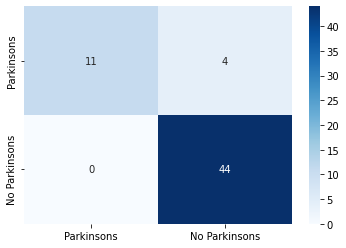

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ["Parkinsons", "No Parkinsons"]
sns.heatmap(cf_matrix, annot=True,cmap='Blues', xticklabels=categories, yticklabels=categories)

In [37]:
params = {
    'n_neighbors': [1, 3, 5],
}

classifier = GridSearchCV(estimator=knn,
param_grid=params,
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
verbose=1,
n_jobs = -1)

classifier.fit(X,y)
print(f"best params: {classifier.best_params_}")
print(f"best acc: {classifier.best_score_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
best params: {'n_neighbors': 1}
best acc: 0.9282051282051281


## Genetic Feature Selection

In [38]:
!pip install sklearn-genetic

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [39]:

from genetic_selection import * 
from sklearn.metrics import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
mcc = make_scorer(matthews_corrcoef)



estimator = RandomForestClassifier(random_state=42, n_estimators=1000)
# #estimator = GradientBoostingClassifier(max_depth=3, random_state=27, n_estimators=100)

# #estimator = LinearDiscriminantAnalysis()


report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
rkf = RepeatedStratifiedKFold(n_repeats = 1, n_splits = 10, random_state = 42)
for i in [X.shape[1]]:
  
  selector = GeneticSelectionCV(estimator,
                                cv = rkf,
                                verbose = 0,
                                scoring = mcc,
                                max_features = i,
                                n_population = 50,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  # selector = selector.fit(D[allfeats], y)
  # genfeats = D[allfeats].columns[selector.support_]
  selector = selector.fit(X, y)
  genfeats = X.columns[selector.support_]
  #print("El Selector support: "+str(selector.support_))
  genfeats = list(genfeats)
  print("Chosen Feats:  ", genfeats)

  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore
report.head(10)

Chosen Feats:   ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread2', 'PPE']


,No of Feats,Chosen Feats,Scores
0,9,"[MDVP:Fo(Hz), MDVP:Flo(Hz), MDVP:Jitter(Abs), ...",0.847156


In [40]:
"""
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:APQ5', 'NHR', 'HNR', 'DFA', 'spread2', 'PPE'] 
84.8% acc
"""

#Luego de multiples corridas con diferentes parámetros seleccionados, la mejor fue con la configuración mencionada anteriormente

"\n['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:APQ5', 'NHR', 'HNR', 'DFA', 'spread2', 'PPE'] \n84.8% acc\n"

In [41]:
#Se seleccionan los parámetros mencionados anteriormente 
X= X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:APQ5', 'NHR', 'HNR', 'DFA', 'spread2', 'PPE']]
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:DDP,Shimmer:APQ3,Shimmer:APQ5,NHR,HNR,DFA,spread2,PPE
0,-0.827171,-0.415271,0.730419,1.001937,0.543770,0.869328,1.281737,0.496891,-0.192729,1.756293,0.479243,0.866655
1,-0.768992,-0.571305,1.097305,1.189745,0.904351,1.488428,1.919248,0.372162,-0.632879,1.832844,1.307819,1.798974
2,-0.907141,-0.917587,1.238811,1.355404,1.153822,1.269276,1.644953,0.017714,-0.279042,1.937062,1.015070,1.399060
3,-0.907286,-0.778925,1.148675,1.355404,1.025137,1.369834,1.709904,0.047937,-0.280624,1.827676,1.290518,1.802314
4,-0.923281,-0.701794,1.588933,1.637642,1.446398,1.672399,2.033435,0.291975,-0.505444,1.904461,0.095948,2.261262


### Optimización de Hiperparámetros para distintos algoritmos.

## XGBoost

In [42]:
!pip install xgboost

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [43]:

from xgboost import XGBClassifier
from sklearn.model_selection import KFold

params = {
    'max_depth': [5, 8, 10],
    'learning_rate': [0.025, 0.04, 0.05,0.75, 0.1, 0.125],
    'n_estimators' : [80, 100, 125, 350, 500]
}
xgb = XGBClassifier(seed = 42)

classifier = GridSearchCV(estimator=xgb,
param_grid=params,
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
verbose=1,
n_jobs = -1)

classifier.fit(X,y)
print(f"best params: {classifier.best_params_}")
print(f"best acc: {classifier.best_score_}")
# 83,58 con predictores seleccionados con estrategia genética
#best params: {'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 125}
#best acc: 0.8358974358974359

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 350}
best acc: 0.9435897435897436


In [44]:
#max_depth=5, random_state=42, n_estimators=250
n_features = X.shape[1]
params = {
    "max_features":[n_features, (n_features//3), (n_features//5), (n_features*2//5),(n_features*3//5), (n_features*4//5)],
    'n_estimators' : [ 1000, 1250, 2000, 3000]
}
randomForest = RandomForestClassifier(random_state= 42)

classifier = GridSearchCV(estimator=randomForest,
param_grid=params,
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
verbose=1,
n_jobs = -1)

classifier.fit(X,y)
print(f"best params: {classifier.best_params_}")
print(f"best acc: {classifier.best_score_}")
#81 con con predictores seleccionados con estrategia genética
#best params: {'max_features': 2, 'n_estimators': 1000}
#best acc: 0.8153846153846154

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best params: {'max_features': 12, 'n_estimators': 3000}
best acc: 0.9333333333333332


### PCA

In [45]:
# Utilizamos los predictores normalizados
y = normalized_df["status"]
X = normalized_df.drop(columns=["status"])

In [46]:
#PCA con dato
from sklearn.decomposition import PCA
def generatePCA(df_predictors, df_target, n_components):
  print(n_components)
  pca = PCA(n_components= n_components)
  principalComponents = pca.fit_transform(df_predictors)
  column_names = [f"pc_{i}" for i in range(n_components)]
  print(column_names)
  principalDf = pd.DataFrame(data = principalComponents
                             , columns = column_names)
  
  df_result = pd.concat([df_target, principalDf], axis=1)
  return df_result

#### Modelos creados con los primeros n componentes proncipales (Realizo pruebas de 5 a 9)

In [47]:
bestRFPCModelResults= []
for i in range(5,10):
    pca = generatePCA(X,y,i)
    pca_y = pca["status"]
    pca_X = pca.drop(columns=["status"])
    n_features = pca_X.shape[1]
    params = {
        "max_features":[n_features, (n_features//3), (n_features//5), (n_features*2//5),(n_features*3//5), (n_features*4//5)],
        'n_estimators' : [ 1000, 1250, 2000, 3000]
    }
    randomForest = RandomForestClassifier(random_state= 42)

    classifier = GridSearchCV(estimator=randomForest,
    param_grid=params,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs = -1)

    classifier.fit(pca_X,pca_y)
    print(f"{i} best params: {classifier.best_params_}")
    print(f"{i} best acc: {classifier.best_score_}")
    bestRFPCModelResults.append({"i":i, "params": classifier.best_params_, "bestScore":classifier.best_score_})

5
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4']
Fitting 5 folds for each of 24 candidates, totalling 120 fits
5 best params: {'max_features': 5, 'n_estimators': 1000}
5 best acc: 0.8666666666666668
6
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5']
Fitting 5 folds for each of 24 candidates, totalling 120 fits
6 best params: {'max_features': 6, 'n_estimators': 1000}
6 best acc: 0.8666666666666666
7
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6']
Fitting 5 folds for each of 24 candidates, totalling 120 fits
7 best params: {'max_features': 4, 'n_estimators': 1000}
7 best acc: 0.8974358974358975
8
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7']
Fitting 5 folds for each of 24 candidates, totalling 120 fits
8 best params: {'max_features': 8, 'n_estimators': 1000}
8 best acc: 0.8923076923076921
9
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8']
Fitting 5 folds for each of 24 candidates, totalling 120 fits
9 best params: {'max_features': 3, 'n_estim

In [48]:
#collapse_output
bestPCModelResults = []
for i in range(5,10):
    pca = generatePCA(X,y,i)
    pca_y = pca["status"]
    pca_X = pca.drop(columns=["status"])
    n_features = pca_X.shape[1]
    params = {
        'max_depth': [3,4,5],
        'learning_rate': [0.075, 0.1, 0.125],
        'n_estimators' : [ 1000, 3000],
        "early_stopping_rounds":[50]
    }
    xgb = XGBClassifier(seed = 42)

    classifier = GridSearchCV(estimator=xgb,
    param_grid=params,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs = -1)

    classifier.fit(pca_X,pca_y)
    print(f"{i} best params: {classifier.best_params_}")
    print(f"{i} best acc: {classifier.best_score_}")
    bestPCModelResults.append({"i":i, "params": classifier.best_params_, "bestScore":classifier.best_score_})

    

5
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4']
Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5 best params: {'early_stopping_rounds': 50, 'learning_rate': 0.075, 'max_depth': 4, 'n_estimators': 1000}
5 best acc: 0.8666666666666666
6
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5']
Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
6 best params: {'early_stopping_rounds': 50, 'learning_rate': 0.075, 'max_depth': 3, 'n_estimators': 1000}
6 best acc: 0.8717948717948719
7
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6']
Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7 best params: {'early_stopping_rounds': 50, 'learning_rate': 0.075, 'max_depth': 5, 'n_estimators': 1000}
7 best acc: 0.8717948717948719
8
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7']
Fitting 5 folds for each of 18 candidates, totalling 90

C:\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
8 best params: {'early_stopping_rounds': 50, 'learning_rate': 0.075, 'max_depth': 3, 'n_estimators': 1000}
8 best acc: 0.8769230769230768
9
['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8']
Fitting 5 folds for each of 18 candidates, tota

C:\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
9 best params: {'early_stopping_rounds': 50, 'learning_rate': 0.075, 'max_depth': 3, 'n_estimators': 1000}
9 best acc: 0.8769230769230768


## Conclusiones
Luego de realizar distintas formas de preprocesamiento a los datos para los distintos algoritmos candidatos, habiendo aplicado optimización de features y de hiperparámetros, podemos concluir que el mejor algoritmo para la creación del modelo en cuanto a la exactitud es: XGBoost con parámetros los siguientes parámetros 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 350. Los predictores utilizados fueron los obtenidos con el enfoque evolutivo para feature selection

La creación de componentes principales para luego generar modelos con random forest y XGBoost obtuvo una performance menor que la obtenida por los modelos generados con estos mismos algoritmos utilizando los atributos originales (con las transformaciones realizadas anteriormente).

No obstante, el algoritmo KNN (con k=1 y distancia euclídea) obtuvo una exactitud comparable (0.928 contra 0.943), y como el dataset es uno muy pequeño, este modelo podría ser considerado como opción válida (para datasets grandes, el consumo de memoria y de procesamiento para hacer predicciones es muy alto) si la explicabilidad del modelo es importante para el cliente. 